In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os

# plot for presentation

## multiple experiments

In [2]:
coarse_aspect = {0: 'general',
                 1: 'price', 
                 2: 'experienced quality',
                 3: 'safety and healthiness',
                 4: 'trustworthy sources',
                 5: 'environment'}

In [3]:
def standard_deviation(result):
    '''
    result: [n_experiments, n_iter]
    '''
    mean = result.mean(axis=0)
    var = ((result - mean) ** 2).sum(axis=0) / result.shape[0]
    std = np.sqrt(var)
    return mean, std

In [4]:
def build_array(result_dict_list, key):
    n_experiments = len(result_dict_list)
    array_list = [result[key] for result in result_dict_list]
    array_list = np.stack(array_list, axis=0)
    return array_list

def build_array_multiclass(result_dict_list, key):
    n_experiments = len(result_dict_list)
    n_asp = len(result_dict_list[0][key][0])
    array_list = []
    for i in range(n_experiments):
        array_list.append(np.stack(result_dict_list[i][key], axis=0))
    array_list = np.stack(array_list, axis=0)   # [n_exp, n_iter, n_asp]
    return array_list

In [5]:
def errorbar_plot(data_array, metric, file_name=None):
    plt.figure()
    n_iter = data_array.shape[1]
    n_exp = data_array.shape[0]
    mean, std = standard_deviation(data_array)
    x = np.arange(n_iter) + 1
    plt.errorbar(x, mean, yerr=std, fmt='or-', label=metric)
    plt.xlabel('iterations')
    plt.ylabel(metric)
    if file_name != None:
        plt.savefig(file_name)
    plt.show()

def errorbar_plot_multiclass(data_array, metric, class_dict, file_name=None):
    n_exp = data_array.shape[0]
    n_iter = data_array.shape[1]
    n_asp = data_array.shape[-1]
    for i in range(n_asp):
        sub_array = data_array[:, :, i]
        assert list(sub_array.shape) == [n_exp, n_iter]
        mean, std = standard_deviation(sub_array)
        x = np.arange(n_iter) + 1
        plt.errorbar(x, mean, yerr=std, label=class_dict[i])
    plt.legend()
    plt.xlabel('iterations')
    plt.ylabel(metric)
    if file_name is not None:
        plt.savefig(file_name)
    plt.show()

In [12]:
def pickle_load(file_name):
    with open(file_name, 'rb') as f:
        experiment_result = pickle.load(f)
    return experiment_result

In [6]:
# result_file = '../output/result_w2v_organ_freeze.pkl'
result_file = '../output/result_w2v_organ_nofreeze.pkl'

In [15]:
experiment_result = pickle_load(result_file)
experiment_result

[{'loss': [338.1247009853147,
   323.13379133692325,
   320.1011687224766,
   318.2537786375801,
   317.02257612696235,
   316.1342717296672,
   315.2788492886525,
   314.5643825602981],
  'agreement_ratio': [0.9301666021347046,
   0.9778081178665161,
   0.974987804889679,
   0.9760834574699402,
   0.9737569689750671,
   0.9747641682624817,
   0.9731795787811279,
   0.9702314138412476],
  'micro_f1': [0.32707488798805207,
   0.3279283123533177,
   0.3309152976317474,
   0.330701941540431,
   0.3287817367185833,
   0.3304885854491146,
   0.32899509280989975,
   0.32984851717516533],
  'macro_f1': [0.09948293501694816,
   0.09864448662965182,
   0.09797632501177773,
   0.09723467072038045,
   0.09227630026254273,
   0.10130607247610508,
   0.09673368520243465,
   0.09733589880657571],
  'precision': [array([0.33527175, 0.04545455, 0.25      , 0.26923077, 0.13157895,
          0.11111111]),
   array([0.3355615 , 0.04166667, 0.22727273, 0.33333333, 0.1       ,
          0.09756098]),
   ar

In [56]:
class_distribution = {0: 1549, 3: 1314, 4: 576, 2: 483, 5: 469, 1: 296}
n_total = np.sum(list(class_distribution.values()))
class_distribution = {k: class_distribution[k] / n_total for k in class_distribution.keys()}
class_distribution

{0: 0.3304885854491146,
 3: 0.2803499039897589,
 4: 0.12289310859825048,
 2: 0.10305099210582462,
 5: 0.10006400682739493,
 1: 0.0631534030296565}

In [16]:
# folder = '../inter_result/organ_w2v_freeze/'
folder = '../inter_result/organ_w2v_nofreeze/'
os.makedirs(folder, exist_ok=True)

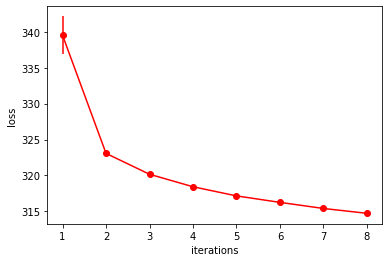

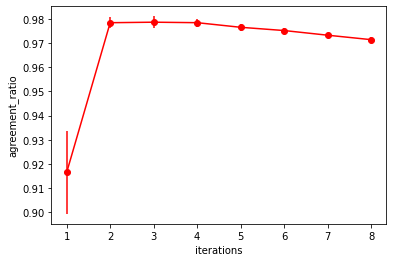

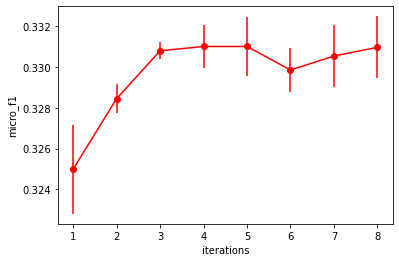

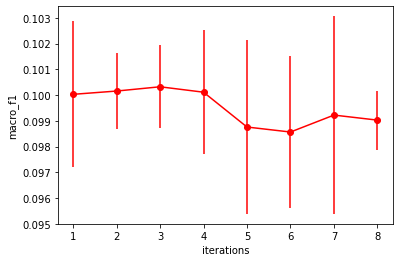

In [17]:
for metric in ['loss', 'agreement_ratio', 'micro_f1', 'macro_f1']:
    array = build_array(experiment_result, metric)
    errorbar_plot(array, metric, folder + metric + '.jpg')

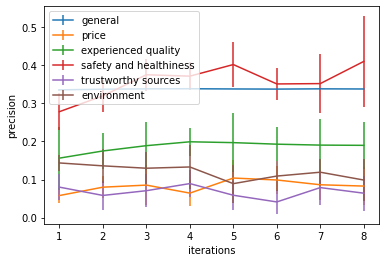

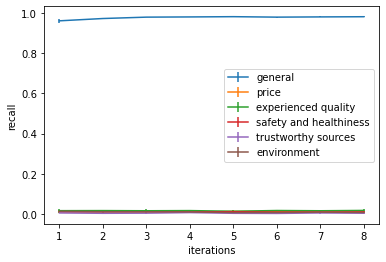

In [18]:
for metric in ['precision', 'recall']:
    data_array = build_array_multiclass(experiment_result, metric)
    # print(data_array)
    errorbar_plot_multiclass(data_array, metric, coarse_aspect, folder + metric + '.jpg')

## comparison between per-batch and per-epoch

In [2]:
loss_perbatch_1 = [313.527, 311.802, 311.646]
f1_perbatch_1 = [0.533, 0.556, 0.568]
agr_perbatch_1 = []
loss_perbatch_2 = [314.355, 311.821, 311.735]
f1_perbatch_2 = [0.498, 0.554, 0.560]
agr_perbatch_2 = [0.958, 0.984, 0.988]
loss_perbatch_3 = [313.292, 311.880, 311.683, 311.701, 332.023]
f1_perbatch_3 = [0.562, 0.564, 0.565, 0.570, 0.462]
agr_perbatch_3 = [0.969, 0.986, 0.989, 0.990, 0.880]
loss_perbatch_4 = [313.794, 311.659, 311.606, 311.570, 311.549]
f1_perbatch_4 = [0.536, 0.568, 0.567, 0.560, 0.567]
agr_perbatch_4 = [0.953, 0.985, 0.989, 0.990, 0.991]

In [3]:
loss_perepoch_1 = [303.324, 312.571, 312.140]
f1_perepoch_1 = [0.545, 0.545, 0.545]
agr_perepoch_1 = [0.980, 0.988, 0.990]
loss_perepoch_2 = [303.253, 313.131, 312.405]
f1_perepoch_2 = [0.533, 0.545, 0.556]
agr_perepoch_2 = [0.957, 0.972, 0.984]
loss_perepoch_3 = [302.930, 312.079, 311.898]
f1_perepoch_3 = [0.547, 0.557, 0.557]
agr_perepoch_3 = [0.982, 0.986, 0.987]
loss_perepoch_4 = [302.964, 312.610, 312.047, 311.868, 311.733]
f1_perepoch_4 = [0.544, 0.553, 0.557, 0.560, 0.559]
agr_perepoch_4 = [0.975, 0.979, 0.984, 0.985, 0.984]

### errorbar

In [4]:
def standard_deviation(result):
    '''
    result: [n_experiments, n_iter]
    '''
    mean = result.mean(axis=0)
    var = ((result - mean) ** 2).sum(axis=0) / result.shape[0]
    std = np.sqrt(var)
    return mean, std

In [5]:
def build_array(prefix, n_experiment, n_iter):
    l = []
    for i in np.arange(n_experiment) + 1:
        element = eval(prefix + f'_{i}')
        if element == []:
            continue
        l.append(element[:n_iter])
    l = np.stack(l, axis=0)
    return l

In [6]:
f1_perbatch = build_array('f1_perbatch', 4, 3)
f1_perepoch = build_array('f1_perepoch', 4, 3)
agr_perbatch = build_array('agr_perbatch', 4, 3)
agr_perepoch = build_array('agr_perepoch', 4, 3)

In [7]:
print(f1_perbatch)
print(f1_perepoch)
print(agr_perbatch)
print(agr_perepoch)

[[0.533 0.556 0.568]
 [0.498 0.554 0.56 ]
 [0.562 0.564 0.565]
 [0.536 0.568 0.567]]
[[0.545 0.545 0.545]
 [0.533 0.545 0.556]
 [0.547 0.557 0.557]
 [0.544 0.553 0.557]]
[[0.958 0.984 0.988]
 [0.969 0.986 0.989]
 [0.953 0.985 0.989]]
[[0.98  0.988 0.99 ]
 [0.957 0.972 0.984]
 [0.982 0.986 0.987]
 [0.975 0.979 0.984]]


In [8]:
mean_f1_batch, err_f1_batch = standard_deviation(f1_perbatch)
mean_f1_epoch, err_f1_epoch = standard_deviation(f1_perepoch)
mean_agr_batch, err_agr_batch = standard_deviation(agr_perbatch)
mean_agr_epoch, err_agr_epoch = standard_deviation(agr_perepoch)

Text(0, 0.5, 'micro f1')

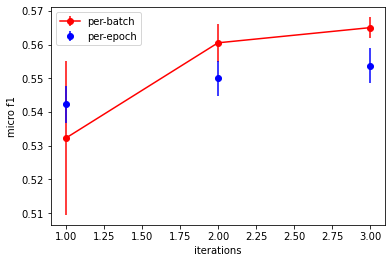

In [11]:
x = np.arange(3) + 1
plt.errorbar(x, mean_f1_batch, yerr=err_f1_batch, fmt='or-', label='per-batch')
plt.errorbar(x, mean_f1_epoch, yerr=err_f1_epoch, fmt='ob', label='per-epoch')
plt.legend()
plt.xlabel('iterations')
plt.ylabel('micro f1')

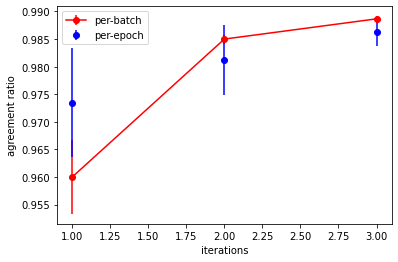

In [12]:
x = np.arange(3) + 1
plt.errorbar(x, mean_agr_batch, yerr=err_agr_batch, fmt='or-', label='per-batch')
plt.errorbar(x, mean_agr_epoch, yerr=err_agr_epoch, fmt='ob', label='per-epoch')
plt.xlabel('iterations')
plt.ylabel('agreement ratio')
plt.legend()

### init plot

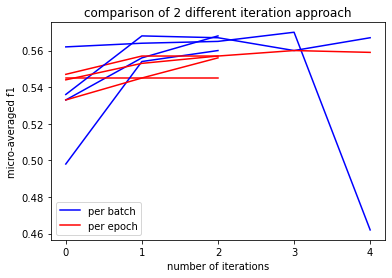

In [28]:
for i in np.arange(4)+1:
    perbatch, = plt.plot(eval(f'f1_perbatch_{i}'), color='b', label='per batch')
    perepoch, = plt.plot(eval(f'f1_perepoch_{i}'), color='r', label='per epoch')
plt.legend(handles=[perbatch, perepoch])
plt.xlabel('number of iterations')
plt.ylabel('micro-averaged f1')
plt.xticks(np.arange(5))
plt.title('comparison of 2 different iteration approach')
plt.savefig('../inter_result/plot_comparison.jpg')
plt.show() 

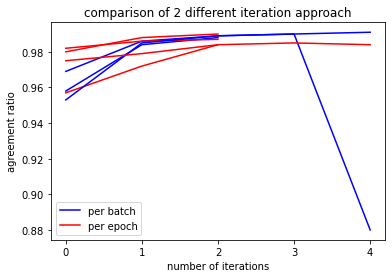

In [31]:
for i in np.arange(4)+1:
    perbatch, = plt.plot(eval(f'agr_perbatch_{i}'), color='b', label='per batch')
    perepoch, = plt.plot(eval(f'agr_perepoch_{i}'), color='r', label='per epoch')
plt.legend(handles=[perbatch, perepoch])
plt.xlabel('number of iterations')
plt.ylabel('agreement ratio')
plt.xticks(np.arange(5))
plt.title('comparison of 2 different iteration approach')
plt.savefig('../inter_result/plot_comparison.jpg')
plt.show() 

# result with word2vec

In [43]:
loss_w2v_1 = [443.764, 393.985, 380.168, 372.851, 369.303]
f1_w2v_1 = [0.409, 0.404, 0.400, 0.395, 0.394]
agr_w2v_1 = [0.618, 0.617, 0.627, 0.631, 0.636]
loss_w2v_2 = [443.388964846406, 395.14113366614225, 381.2450455482157, 373.87326019260547, 370.17587872564116]
f1_w2v_2 = [0.450229709035222, 0.4211332312404288, 0.4333843797856049, 0.41960183767228176, 0.4318529862174579]
agr_w2v_2 = [0.612, 0.611, 0.614, 0.614, 0.618]
loss_w2v_3 = [445.18723547448275, 395.26764406713846, 380.7760130348571, 373.02574791837714, 369.327061393346]
f1_w2v_3 = [0.43950995405819293, 0.4318529862174579, 0.4012251148545176, 0.39663093415007655, 0.39509954058192953]
agr_w2v_3 = [0.6145405769348145, 0.6024291515350342, 0.6073175668716431, 0.6230025291442871, 0.6335373520851135]

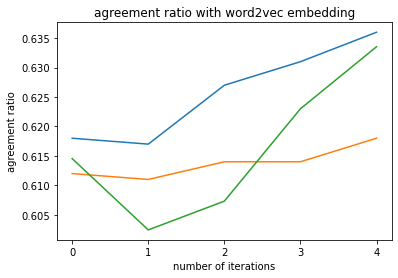

In [45]:
for i in np.arange(3)+1:
    plt.plot(eval(f'agr_w2v_{i}'))
    # perepoch, = plt.plot(eval(f'agr_perepoch_{i}'), color='r', label='per epoch')
# plt.legend(handles=[perbatch, perepoch])
plt.xlabel('number of iterations')
plt.ylabel('agreement ratio')
plt.xticks(np.arange(5))
plt.title('agreement ratio with word2vec embedding')
plt.savefig('../inter_result/plot_w2v.jpg')
plt.show() 

# learn plot

- https://jakevdp.github.io/PythonDataScienceHandbook/04.01-simple-line-plots.html
- https://jakevdp.github.io/PythonDataScienceHandbook/04.03-errorbars.html


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

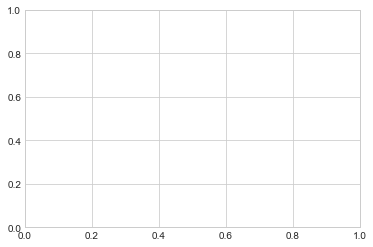

In [2]:
fig = plt.figure()
ax = plt.axes()

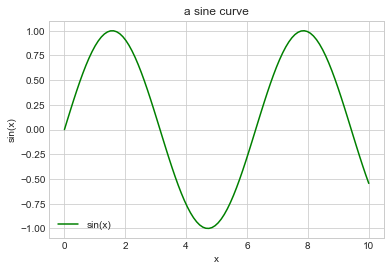

In [6]:
x = np.linspace(0, 10, 100)
plt.plot(x, np.sin(x), color='g', linestyle='-', label='sin(x)')
# color code: rgbcmyk
# -, --, -., :
# solid, dashed, dashdot, dotted
plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5)
# plt.axis([-1, 11, -1.5, 1.5])
plt.axis('tight')   # 'equal'
plt.title('a sine curve')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.legend()

# reverse display
# plt.xlim(10, 0)
# plt.ylim(1.2, -1.2)

[(0.0, 10.0),
 (-2.0, 2.0),
 Text(0.5, 0, 'x'),
 Text(0, 0.5, 'sin(x)'),
 Text(0.5, 1.0, 'a simple plot')]

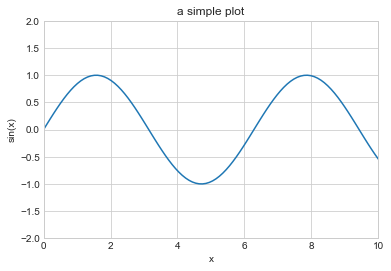

In [7]:
ax = plt.axes()
ax.plot(x, np.sin(x))
ax.set(xlim=(0, 10), ylim=(-2, 2), xlabel='x', ylabel='sin(x)', title='a simple plot')

<ErrorbarContainer object of 3 artists>

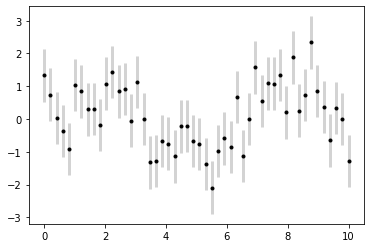

In [3]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)
plt.errorbar(x, y, yerr=dy, fmt='.k', ecolor='lightgray', elinewidth=3, capsize=0)

In [5]:
from sklearn.gaussian_process import GaussianProcessRegressor

model = lambda x: x * np.sin(x)
xdata = np.array([1, 3, 5, 6, 8])
ydata = model(xdata)

gp = GaussianProcessRegressor()
gp.fit(xdata[:, np.newaxis], ydata)

xfit = np.linspace(0, 10, 1000)
yfit, y_std = gp.predict(xfit[:, np.newaxis], return_std=True)
# dyfit = 2 * np.sqrt(y_std)
dyfit = 2 * y_std

(0.0, 10.0)

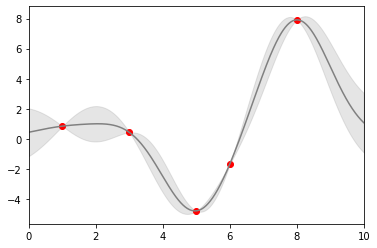

In [6]:
plt.plot(xdata, ydata, 'or')
plt.plot(xfit, yfit, '-', color='gray')
plt.fill_between(xfit, yfit - dyfit, yfit + dyfit, color='gray', alpha=0.2)
plt.xlim(0, 10)